In [1]:
import numpy as np

def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

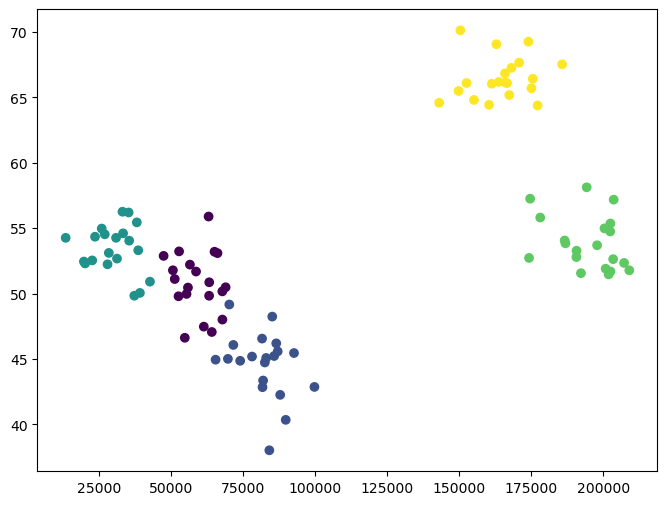

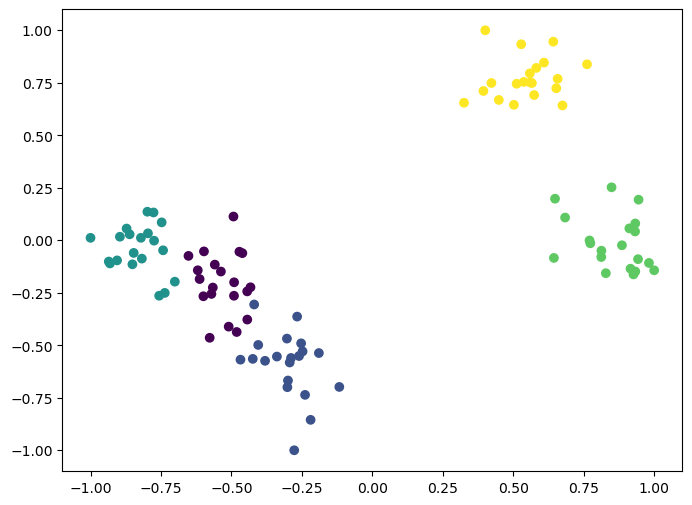

In [4]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float128))
plt.show()

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float128))
plt.show()

In [13]:
from sklearn import svm, datasets
C = 1.0
svc = svm.SVC(kernel='rbf', C=C).fit(X, y)

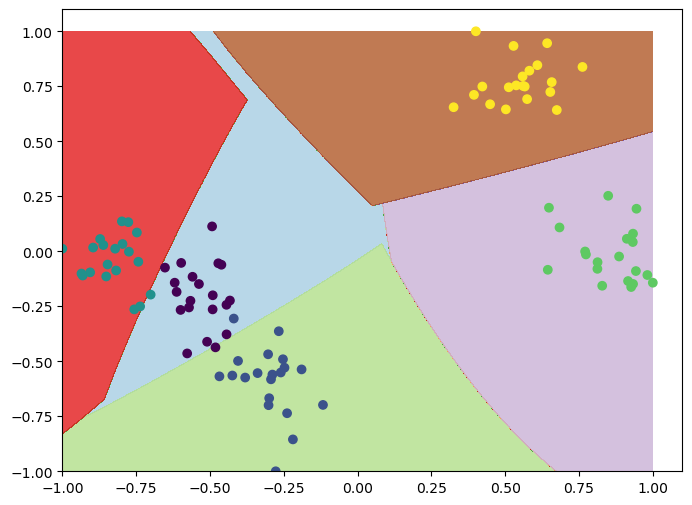

In [14]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(-1, 1, .001), np.arange(-1, 1, .001))

    npx = xx.ravel()
    npy = yy.ravel()

    samplePoints = np.c_[npx, npy]

    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(np.float128))
    plt.show()

plotPredictions(svc)